# HOW GRADIENT DESCENT WORKS AND MATH BEHIND IT

Gradient descent try to minimize cost function. It does this by computing the gradient of the cost func‐
tion with regards to each model parameter θj.
We will use linear regression with 1 variable. In order to reach global minima we will take partial derivate of our cost function on each teta (intercept and coef ) . The direction will take us to stepest slope on out cost function. So we will minus this partial derivate value from teta value. We will run this code and update teta until it converges.

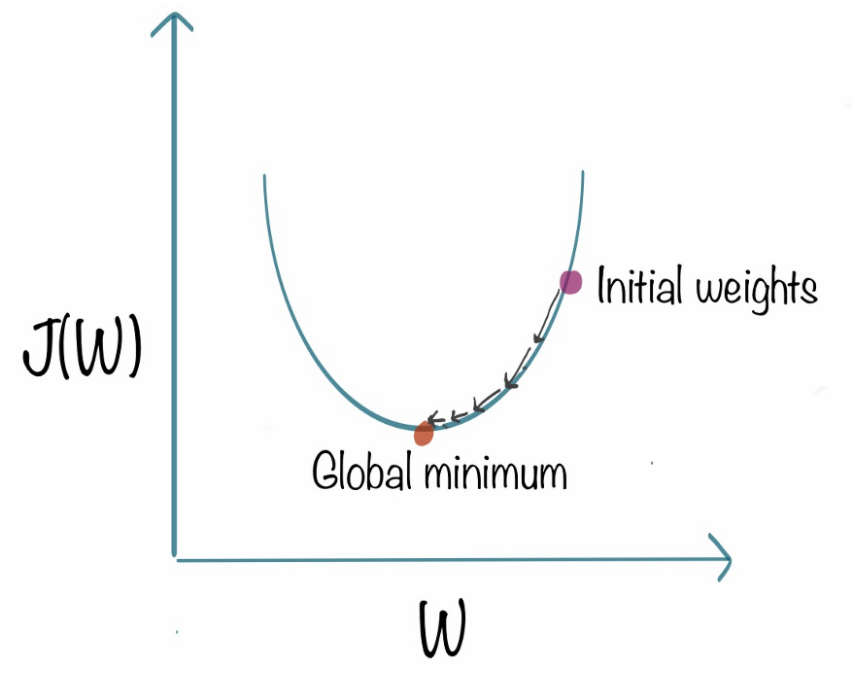

In [22]:
Image("images/gradient_descent.png",width=500)

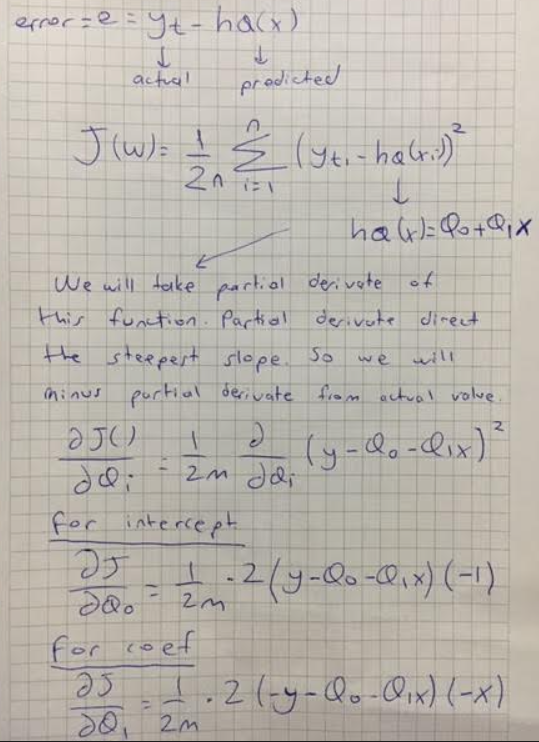

In [23]:
Image("images/partial_derivate.png",width=500)

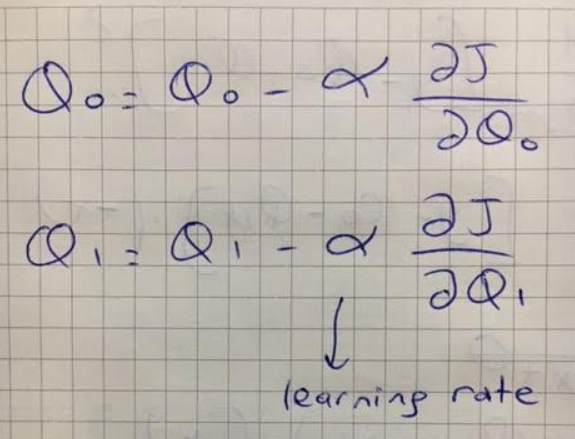

In [24]:
Image("images/update_teta.png",width=500)

In [25]:
from IPython.display import Image

import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
from matplotlib import pyplot

import time

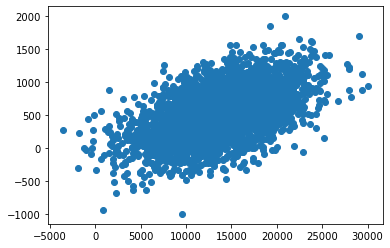

In [26]:
# generate regression dataset
X, y = make_regression(n_samples=3000, n_features=1, noise=150, random_state=40)
# plot regression dataset
# Scale X to 3500..30000 range
X = np.interp(X, (X.min(), X.max()), (-3500, 30000))

# Scale y to 1000..2000 range
y = np.interp(y, (y.min(), y.max()), (-1000, 2000))

pyplot.scatter(X,y)
pyplot.show()

#### Apply MinMaxScaler in order to run epochs faster

In [27]:
from sklearn import preprocessing

xs= preprocessing.MinMaxScaler()
ys= preprocessing.MinMaxScaler()

X = xs.fit_transform(X)
y = ys.fit_transform(y.reshape(-1,1))

# STOCHASTIC GRADIENT DESCENT

### Stochastic gradient descent takes longer time to run all epochs but it converges much earlier . As it picks instances randomly some instances may be picked several times. It gets close to global minima but never settles down on global minima because of its randomness

In [28]:
def stochastic_gradient_descent(X, y, epochs, learning_rate):
    
    teta_0_1 = [50]*(2)
    m = len(X)

    start_time = time.time()
    cost_list = []
    epoch_list = []

    for epoch in range(epochs):
        derivate_intercept=0
        derivate_coef1=0
        for i in range(m):
    
            random_int = np.random.randint(0,m-1)
            sample_x = X[random_int]
            sample_y = y[random_int]
        
            N = len(sample_x)
    
            y_predicted = np.dot(teta_0_1[1], sample_x.T) + teta_0_1[0]
        
            derivate_intercept = (y_predicted.reshape(-1,1)-sample_y.reshape(-1,1))/N
            derivate_coef = (sample_x.T.dot(y_predicted.reshape(-1,1)-sample_y.reshape(-1,1)))/N
    
            teta_0_1[0] = teta_0_1[0] - (learning_rate * derivate_intercept)
            teta_0_1[1] = teta_0_1[1] - (learning_rate * derivate_coef)
    
    
        mse = np.sum((y.reshape(-1,1)-(teta_0_1[0]+teta_0_1[1]*X))**2)/m  
        cost_list.append(mse)
        epoch_list.append(epoch)
    
        if epoch%2==1:  
        
            print("MSE : %.6f"%mse)
            pyplot.scatter(X,y)
            pyplot.plot(X,teta_0_1[0]+teta_0_1[1]*X,c = "r")
            pyplot.title("Epoch : %.0f"%epoch)
            pyplot.show()
        
    end_time = time.time() 
    print("teta_0 : %.2f  teta_1 : %.2f"%(teta_0_1[0], teta_0_1[1]))
    print("time : %.3f"%(end_time-start_time))    
    pyplot.xlabel("epoch")
    pyplot.ylabel("cost")
    pyplot.plot(epoch_list,cost_list)

MSE : 0.969587


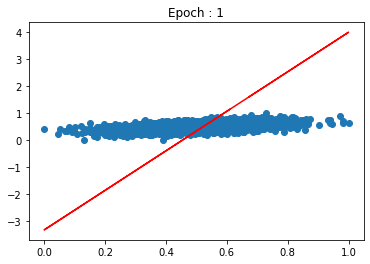

MSE : 0.159681


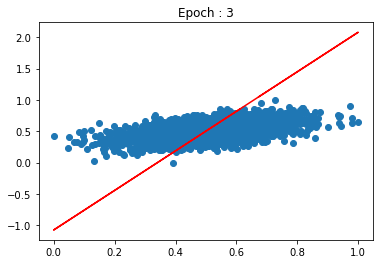

MSE : 0.034028


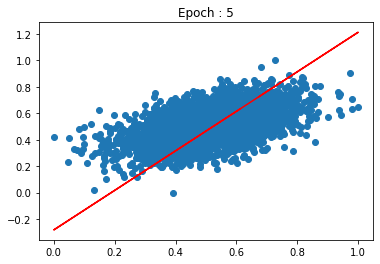

MSE : 0.015446


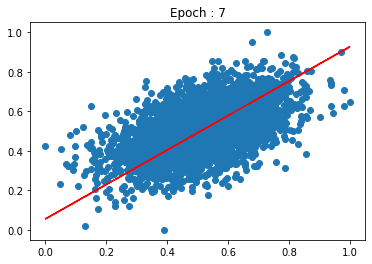

MSE : 0.012658


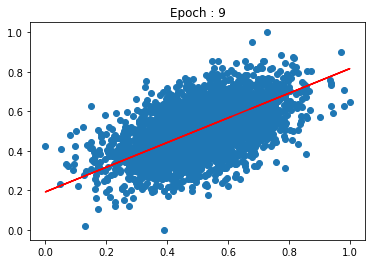

MSE : 0.012181


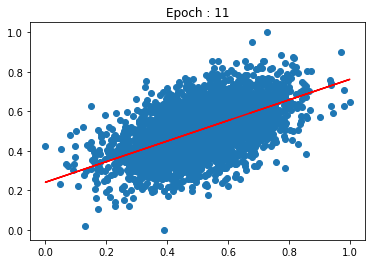

MSE : 0.012186


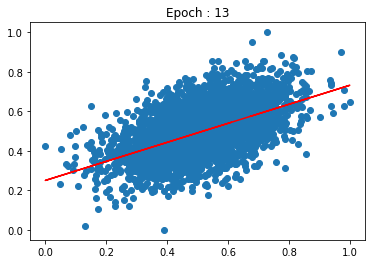

MSE : 0.012129


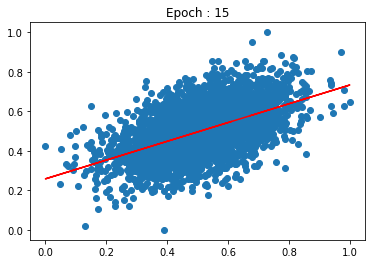

MSE : 0.012310


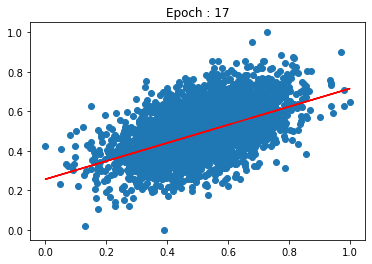

MSE : 0.012223


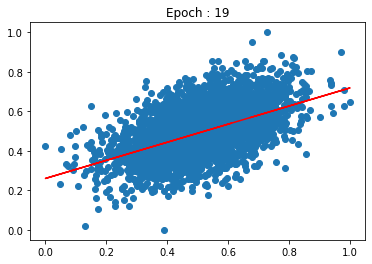

MSE : 0.012349


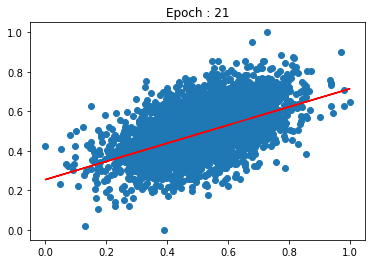

MSE : 0.012125


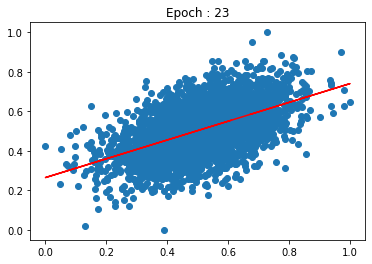

MSE : 0.012328


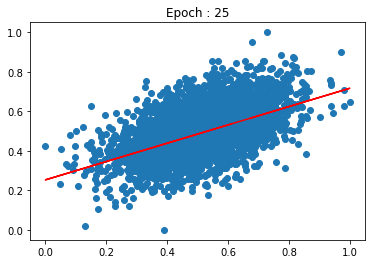

MSE : 0.012116


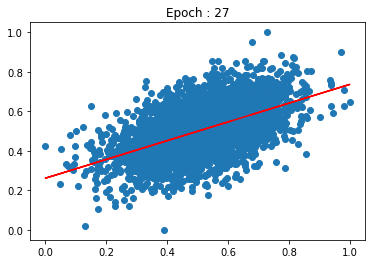

MSE : 0.012266


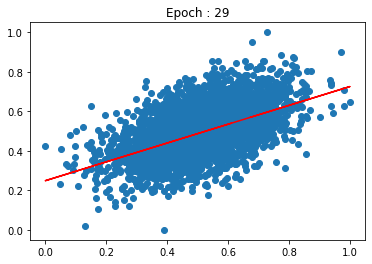

MSE : 0.012119


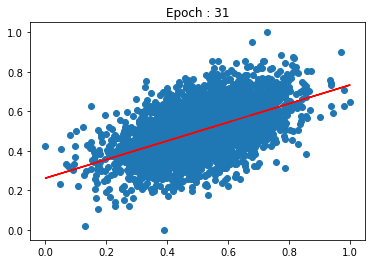

MSE : 0.012115


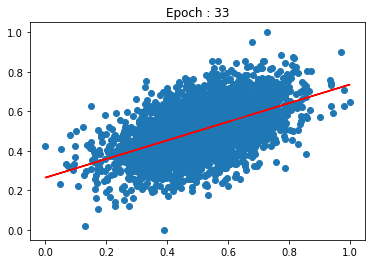

MSE : 0.012133


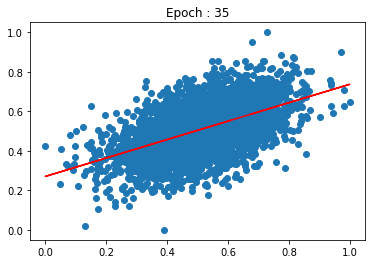

MSE : 0.012119


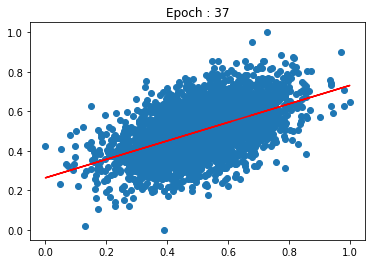

MSE : 0.012336


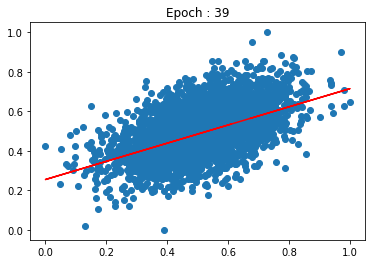

MSE : 0.012122


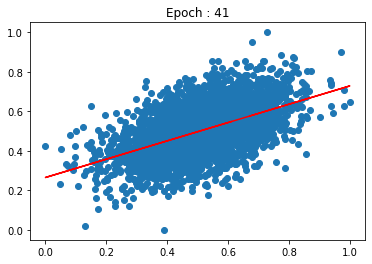

MSE : 0.012292


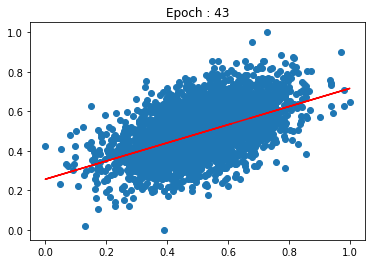

MSE : 0.012186


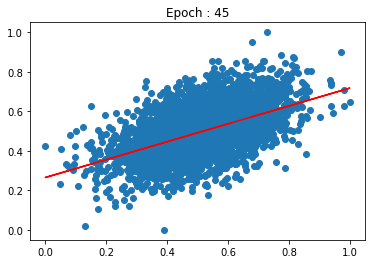

MSE : 0.012117


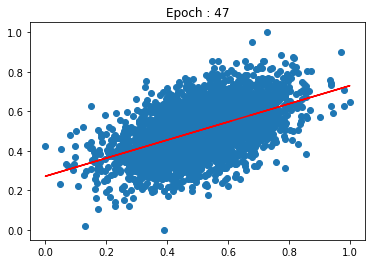

MSE : 0.012120


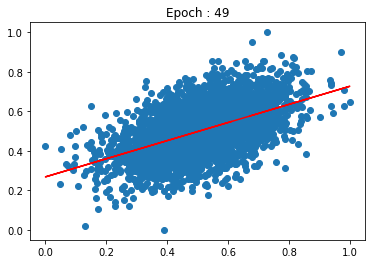

teta_0 : 0.27  teta_1 : 0.46
time : 6.237


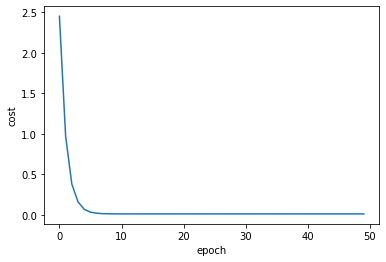

In [29]:
stochastic_gradient_descent(X, y, 50, 0.01)

## STOCHASTIC GRADIENT DESCENT WITH MOMENTUM 

In [30]:
def stochastic_gradient_descent_momentum(X, y, epochs, learning_rate, gamma = 0.9 ):
    
    teta_0_1 = [50]*(2)
    m = len(X)

    start_time = time.time()
    cost_list = []
    epoch_list = []

    v_intercept = 0
    v_coef1 = 0
    
    for epoch in range(epochs):
        derivate_intercept=0
        derivate_coef=0
        for i in range(m):
    
            random_int = np.random.randint(0,m-1)
            sample_x = X[random_int]
            sample_y = y[random_int]
        
            N = len(sample_x)
    
            y_predicted = np.dot(teta_0_1[1], sample_x.T) + teta_0_1[0]
        
            derivate_intercept = (y_predicted.reshape(-1,1)-sample_y.reshape(-1,1))/N
            derivate_coef = (sample_x.T.dot(y_predicted.reshape(-1,1)-sample_y.reshape(-1,1)))/N
            
            v_intercept = (gamma * v_intercept) + derivate_intercept
            v_coef1 = (gamma * v_coef1) + derivate_coef
    
            teta_0_1[0] = teta_0_1[0] - learning_rate*v_intercept
            teta_0_1[1] = teta_0_1[1] - learning_rate*v_coef1
    
    
        mse = np.sum((y.reshape(-1,1)-(teta_0_1[0]+teta_0_1[1]*X))**2)/m  
        cost_list.append(mse)
        epoch_list.append(epoch)
    
        if epoch%2==1:  
        
            print("MSE : %.6f"%mse)
            pyplot.scatter(X,y)
            pyplot.plot(X,teta_0_1[0]+teta_0_1[1]*X,c = "r")
            pyplot.title("Epoch : %.0f"%epoch)
            pyplot.show()
        
    end_time = time.time() 
    print("teta_0 : %.2f  teta_1 : %.2f"%(teta_0_1[0], teta_0_1[1]))
    print("time : %.3f"%(end_time-start_time))    
    pyplot.xlabel("epoch")
    pyplot.ylabel("cost")
    pyplot.plot(epoch_list,cost_list)

MSE : 0.155814


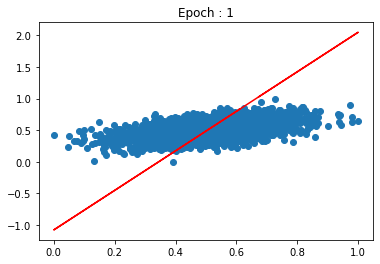

MSE : 0.015720


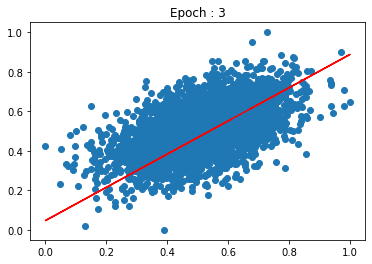

MSE : 0.012473


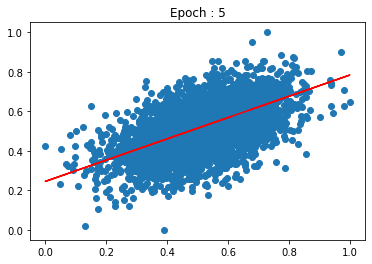

MSE : 0.012618


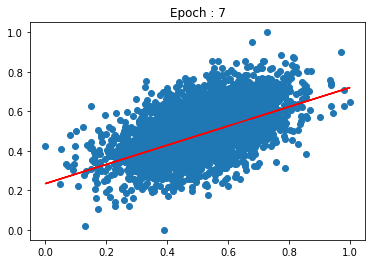

MSE : 0.012117


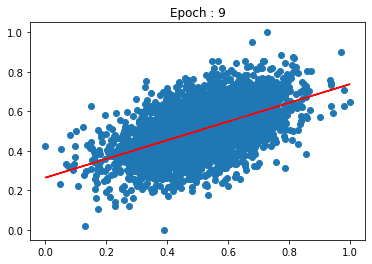

MSE : 0.012243


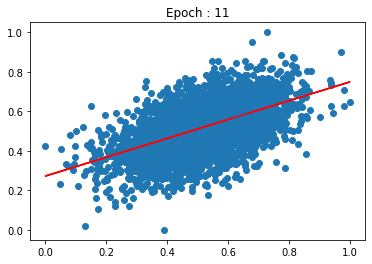

MSE : 0.012276


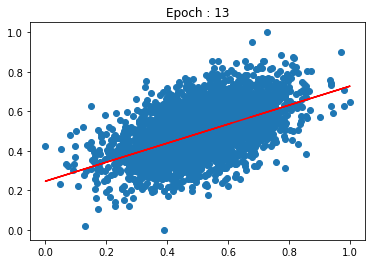

MSE : 0.012474


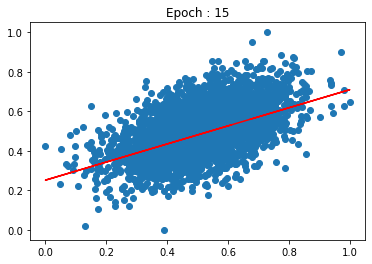

MSE : 0.012116


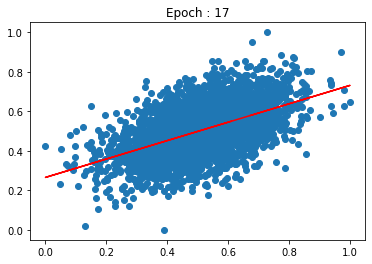

MSE : 0.012288


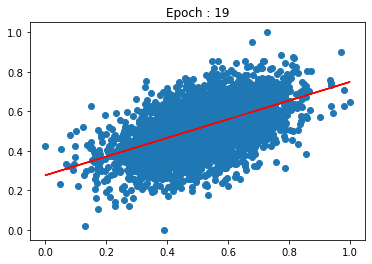

MSE : 0.012116


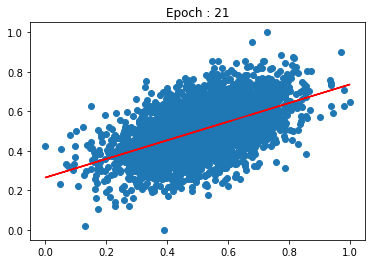

MSE : 0.012198


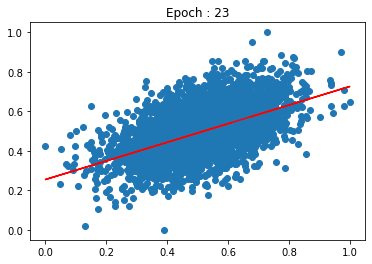

MSE : 0.012119


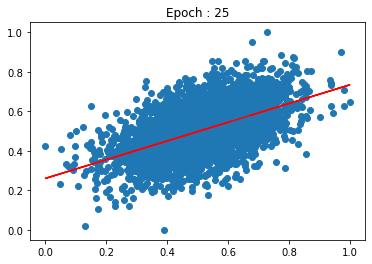

MSE : 0.012130


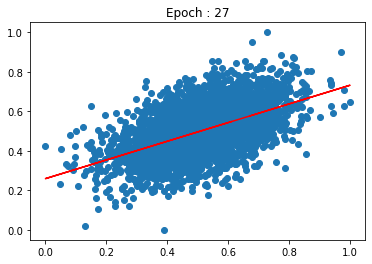

MSE : 0.012137


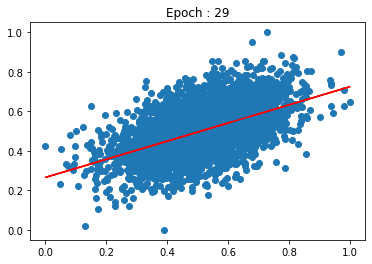

MSE : 0.012116


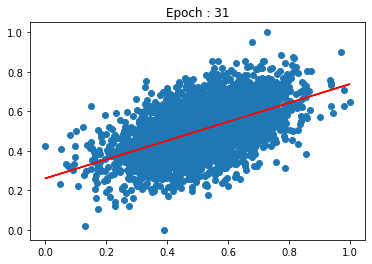

MSE : 0.012119


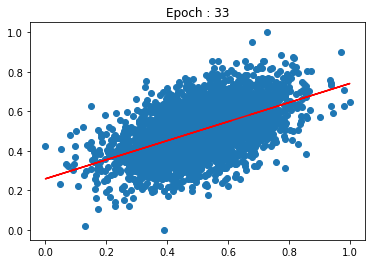

MSE : 0.012939


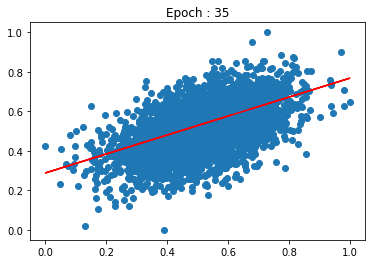

MSE : 0.012204


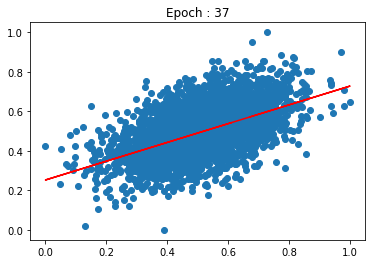

MSE : 0.012151


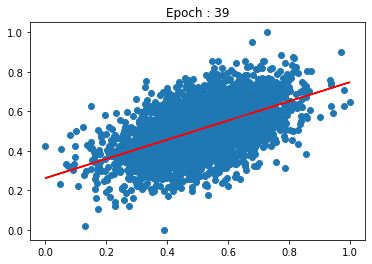

MSE : 0.012128


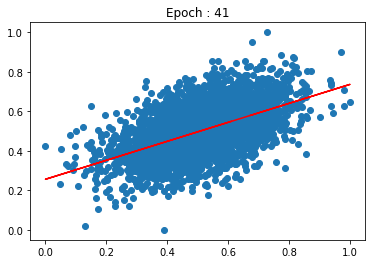

MSE : 0.012188


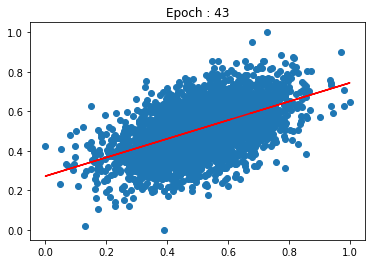

MSE : 0.012752


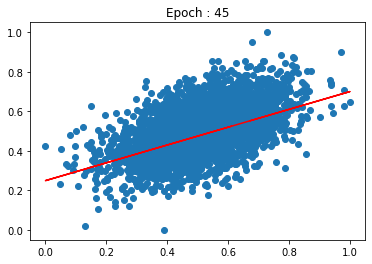

MSE : 0.012260


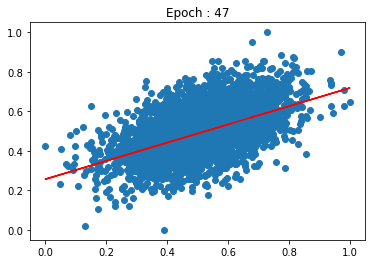

MSE : 0.012328


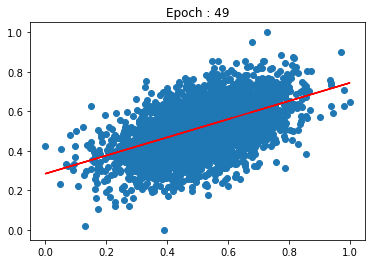

teta_0 : 0.28  teta_1 : 0.46
time : 6.363


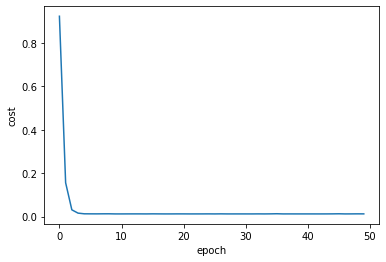

In [31]:
stochastic_gradient_descent_momentum(X, y, 50, 0.01, gamma =0.5)

# Sklearn SGRegressor

In [32]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, penalty=None, tol=None, eta0=0.01, l1_ratio=0)
sgd_reg.fit(X, y.ravel())

SGDRegressor(l1_ratio=0, penalty=None, tol=None)

#### we find close solution to stochastic_gradient_descent function

In [33]:
sgd_reg.intercept_, sgd_reg.coef_

(array([0.26636616]), array([0.46616154]))

# BATCH GRADIENT DESCENT

### Batch gradient descent run through all training samples at each epoch. It needs more epoch to reach convergence. So we will keep learning_rate 0.1 and epoch_size : 3000

In [34]:
def batch_gradient_descent(X, y, epochs, learning_rate):
    start_time = time.time()
    cost_list = []
    epoch_list = []
    
    teta_0_1 = [-0.5]*(2)
    m = len(X)
    
    for epoch in range(epochs):
        
        derivate_intercept=0
        derivate_coef=0
    
        y_predicted = np.dot(teta_0_1[1], X.T) + teta_0_1[0]
        
        derivate_intercept = np.sum(y_predicted.reshape(-1,1)-y.reshape(-1,1))/m
        derivate_coef = (X.T.dot(y_predicted.reshape(-1,1)-y.reshape(-1,1)))/m
    
        teta_0_1[0] = teta_0_1[0] - (learning_rate * derivate_intercept)
        teta_0_1[1] = teta_0_1[1] - (learning_rate * derivate_coef)
    
        mse = np.sum((y.reshape(-1,1)-(teta_0_1[0]+teta_0_1[1]*X))**2)/m
        cost_list.append(mse)
        epoch_list.append(epoch)
    
        if epoch%100 ==1:  
        
            print("MSE : %.6f"%mse)
            pyplot.scatter(X,y)
            pyplot.plot(X,teta_0_1[0]+teta_0_1[1]*X,c = "r")
            pyplot.title("Epoch : %.0f"%epoch)
            pyplot.show()
        
    end_time = time.time()
    print("teta_0 : %.2f  teta_1 : %.2f"%(teta_0_1[0], teta_0_1[1]))
    print("time : %.3f"%(end_time-start_time))  
    pyplot.xlabel("epoch")
    pyplot.ylabel("cost")
    pyplot.plot(epoch_list,cost_list)
    pyplot.ylim((0.012, 0.014))

MSE : 0.949764


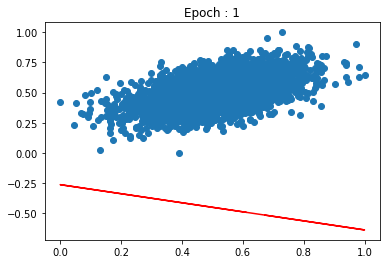

MSE : 0.015040


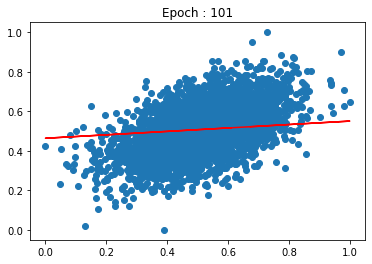

MSE : 0.014239


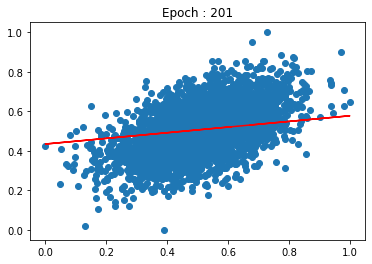

MSE : 0.013657


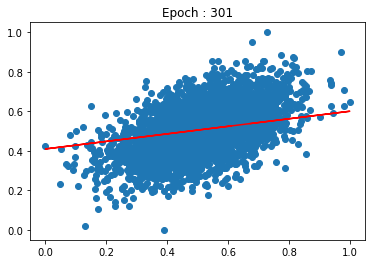

MSE : 0.013234


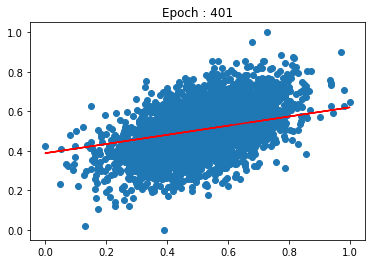

MSE : 0.012927


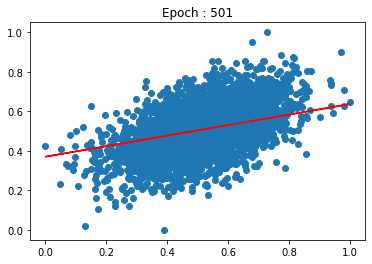

MSE : 0.012704


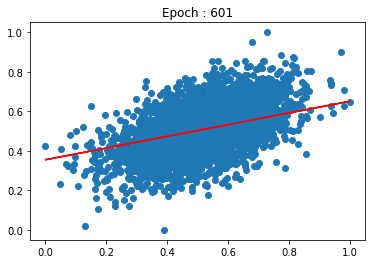

MSE : 0.012543


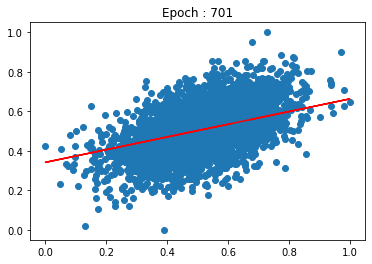

MSE : 0.012425


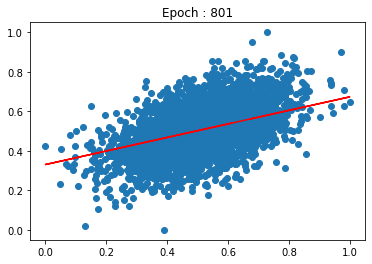

MSE : 0.012340


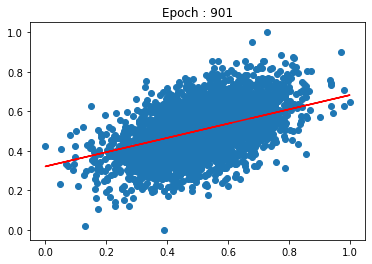

MSE : 0.012278


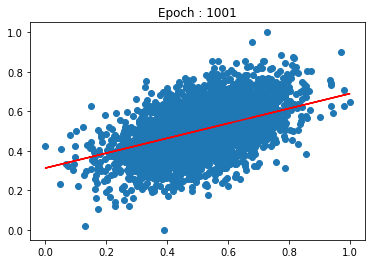

MSE : 0.012233


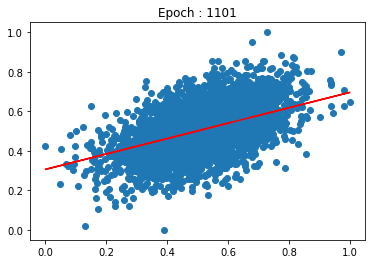

MSE : 0.012201


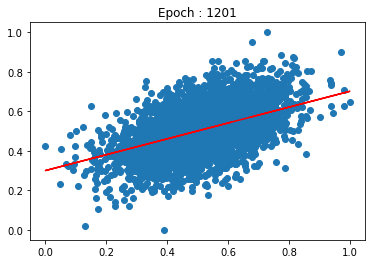

MSE : 0.012177


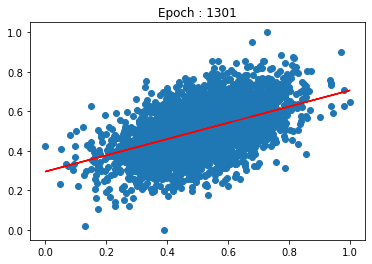

MSE : 0.012160


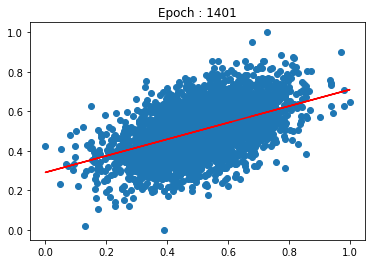

MSE : 0.012147


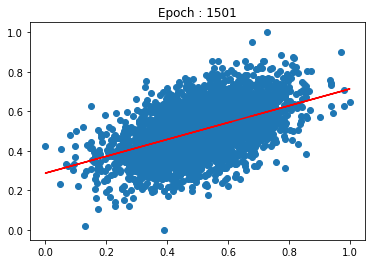

MSE : 0.012138


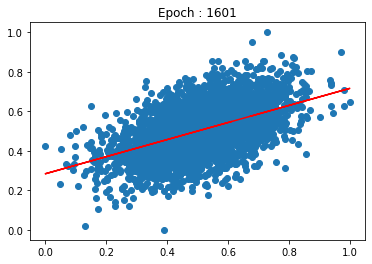

MSE : 0.012132


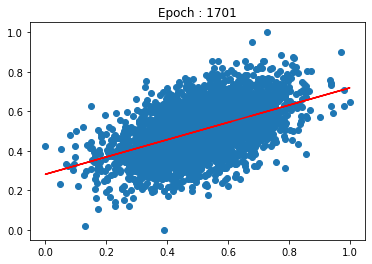

MSE : 0.012127


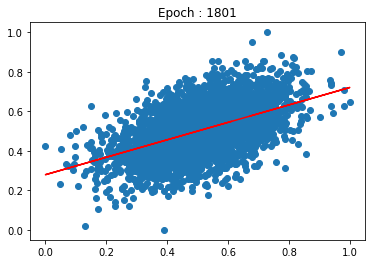

MSE : 0.012123


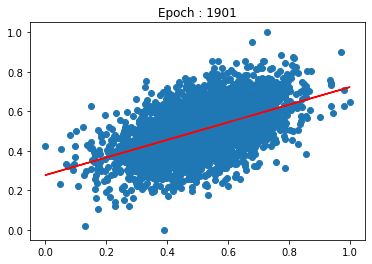

MSE : 0.012121


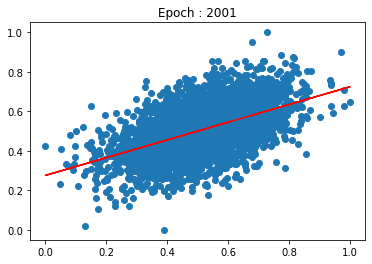

MSE : 0.012119


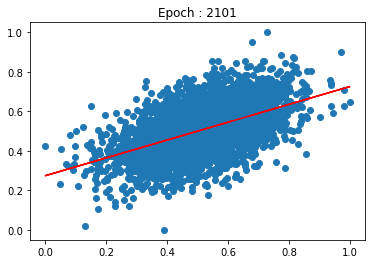

MSE : 0.012118


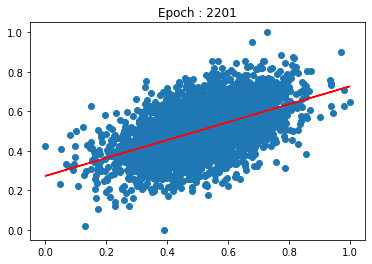

MSE : 0.012117


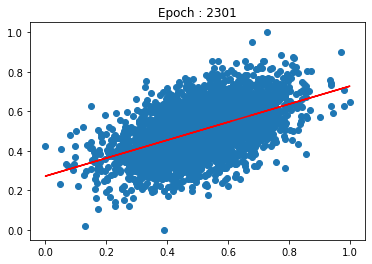

MSE : 0.012116


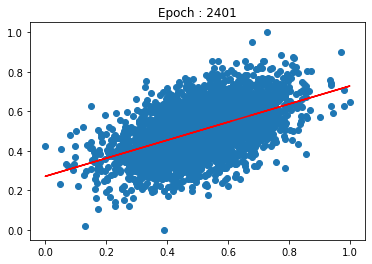

MSE : 0.012116


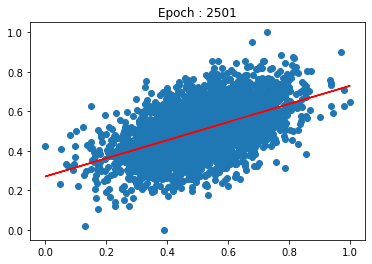

MSE : 0.012115


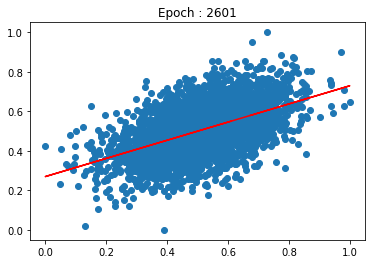

MSE : 0.012115


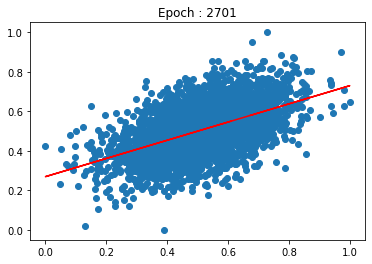

MSE : 0.012115


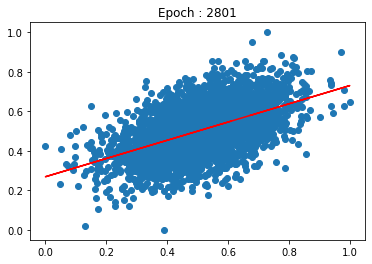

MSE : 0.012115


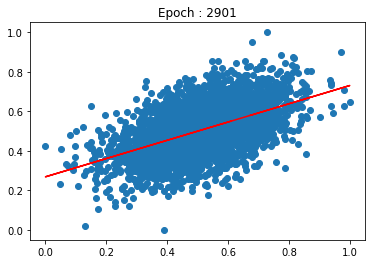

teta_0 : 0.27  teta_1 : 0.46
time : 4.223


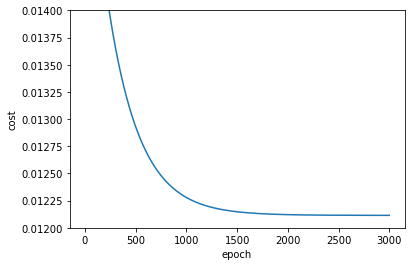

In [35]:
batch_gradient_descent(X, y, 3000, 0.1)

# MINI-BATCH GRADIENT DESCENT

### On mini-batch we will define batch size.  On each epoch we will run len(X)/batch_size iteration. At the beginning of each epoch we will shuffle our data. And we select data of lenght batch_size until we run through all training size.

In [36]:
def mini_batch_gradient_descent(X, y, epochs, batch_size, learning_rate):

    start_time = time.time()
    cost_list = []
    epoch_list = []
    
    teta_0_1 = [-0.5]*(2)
    m = len(X)

    for epoch in range(epochs):
        
        derivate_intercept=0
        derivate_coef=0
    
        indices = np.random.permutation(m)
        X=X[indices]
        y=y[indices]
    
        for i in range(0,m,batch_size):
        
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            N = len(X_i)
            y_predicted = np.dot(teta_0_1[1], X_i.T) + teta_0_1[0]
        
            derivate_intercept = np.sum(y_predicted.reshape(-1,1)-y_i.reshape(-1,1))/N
            derivate_coef = (X_i.T.dot(y_predicted.reshape(-1,1)-y_i.reshape(-1,1)))/N
    
            teta_0_1[0] = teta_0_1[0] - (learning_rate * derivate_intercept)
            teta_0_1[1] = teta_0_1[1] - (learning_rate * derivate_coef)
    
        mse = np.sum((y.reshape(-1,1)-(teta_0_1[0]+teta_0_1[1]*X))**2)/m   
        cost_list.append(mse)
        epoch_list.append(epoch)
        
        if epoch%100==0:  
        
            print("MSE : %.6f"%mse)
            pyplot.scatter(X,y)
            pyplot.plot(X,teta_0_1[0]+teta_0_1[1]*X,c = "r")
            pyplot.title("Epoch : %.0f"%epoch)
            pyplot.show()
           
    end_time = time.time() 
    print("teta_0 : %.2f  teta_1 : %.2f"%(teta_0_1[0], teta_0_1[1]))
    print("time : %.3f"%(end_time-start_time))
    pyplot.xlabel("epoch")
    pyplot.ylabel("cost")
    pyplot.plot(epoch_list,cost_list)
    pyplot.ylim((0.012, 0.014))

MSE : 0.015923


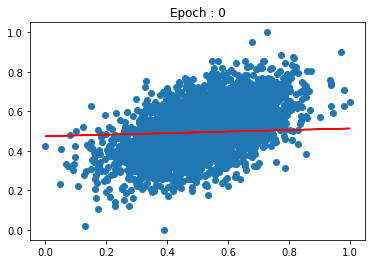

MSE : 0.012116


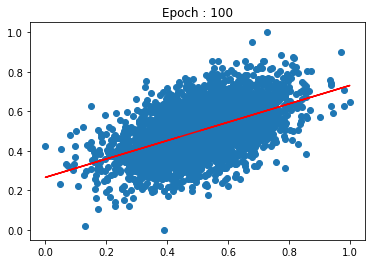

MSE : 0.012114


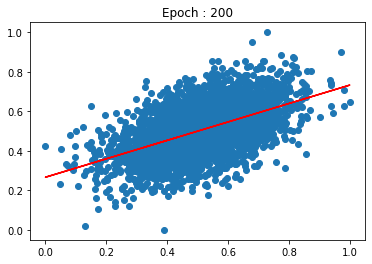

MSE : 0.012118


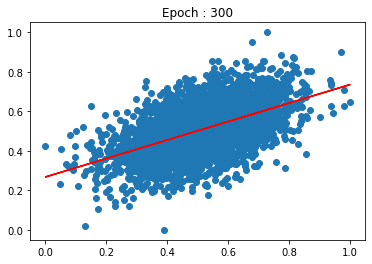

MSE : 0.012126


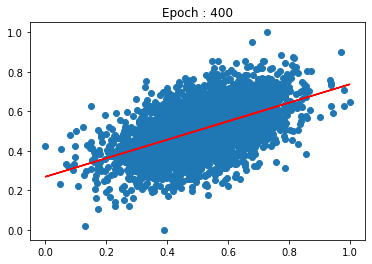

MSE : 0.012117


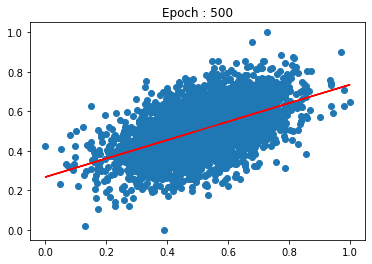

MSE : 0.012120


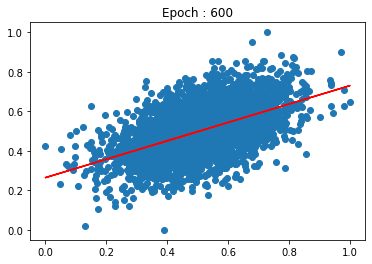

MSE : 0.012115


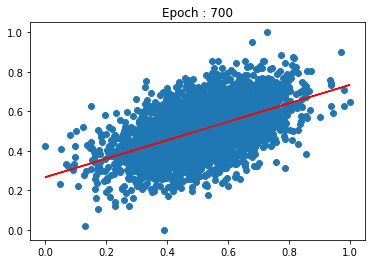

MSE : 0.012138


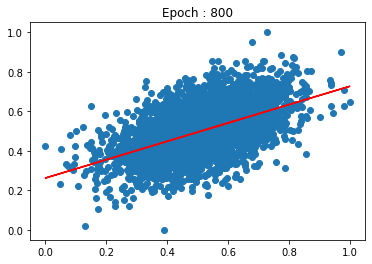

MSE : 0.012123


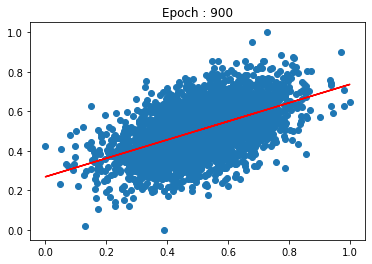

teta_0 : 0.27  teta_1 : 0.47
time : 8.189


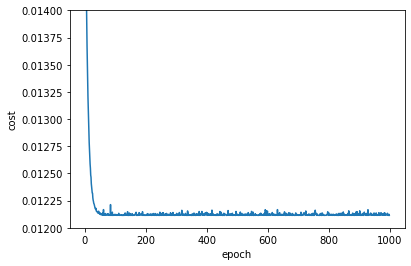

In [37]:
mini_batch_gradient_descent(X, y, 1000, 8, 0.01)